## Librerias y entorno

In [1]:
import cv2
import numpy as np
from ultralytics import YOLO

import cv2
import matplotlib.pyplot as plt
import mediapipe as mp

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

## Cargamos el modelo previamente entrenado

In [3]:
model = YOLO('C:\\Users\\Usuario\\Desktop\\CV\\Computer-Vision\\runs\\detect\\train\\weights\\best.pt')

## Pruebas con nuevas imagenes 

Las imagenes que se encuentran en la carpeta 'new_test_images' fueron tomadas con la camara frontal del celular.
Veremos como actúa con imagenes nuevas, distintas que con las que fue entrenado, validado y probado el modelo.

In [4]:
test_images_dir = r'new_test_images' 


0: 640x480 1 A, 262.7ms
Speed: 8.3ms preprocess, 262.7ms inference, 10.4ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 B, 162.2ms
Speed: 4.1ms preprocess, 162.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 C, 267.3ms
Speed: 0.0ms preprocess, 267.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 I, 148.7ms
Speed: 5.9ms preprocess, 148.7ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 L, 148.6ms
Speed: 0.9ms preprocess, 148.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 E, 126.7ms
Speed: 3.4ms preprocess, 126.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 B, 127.3ms
Speed: 0.0ms preprocess, 127.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 A, 159.3ms
Speed: 3.0ms preprocess, 159.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x480 1 D

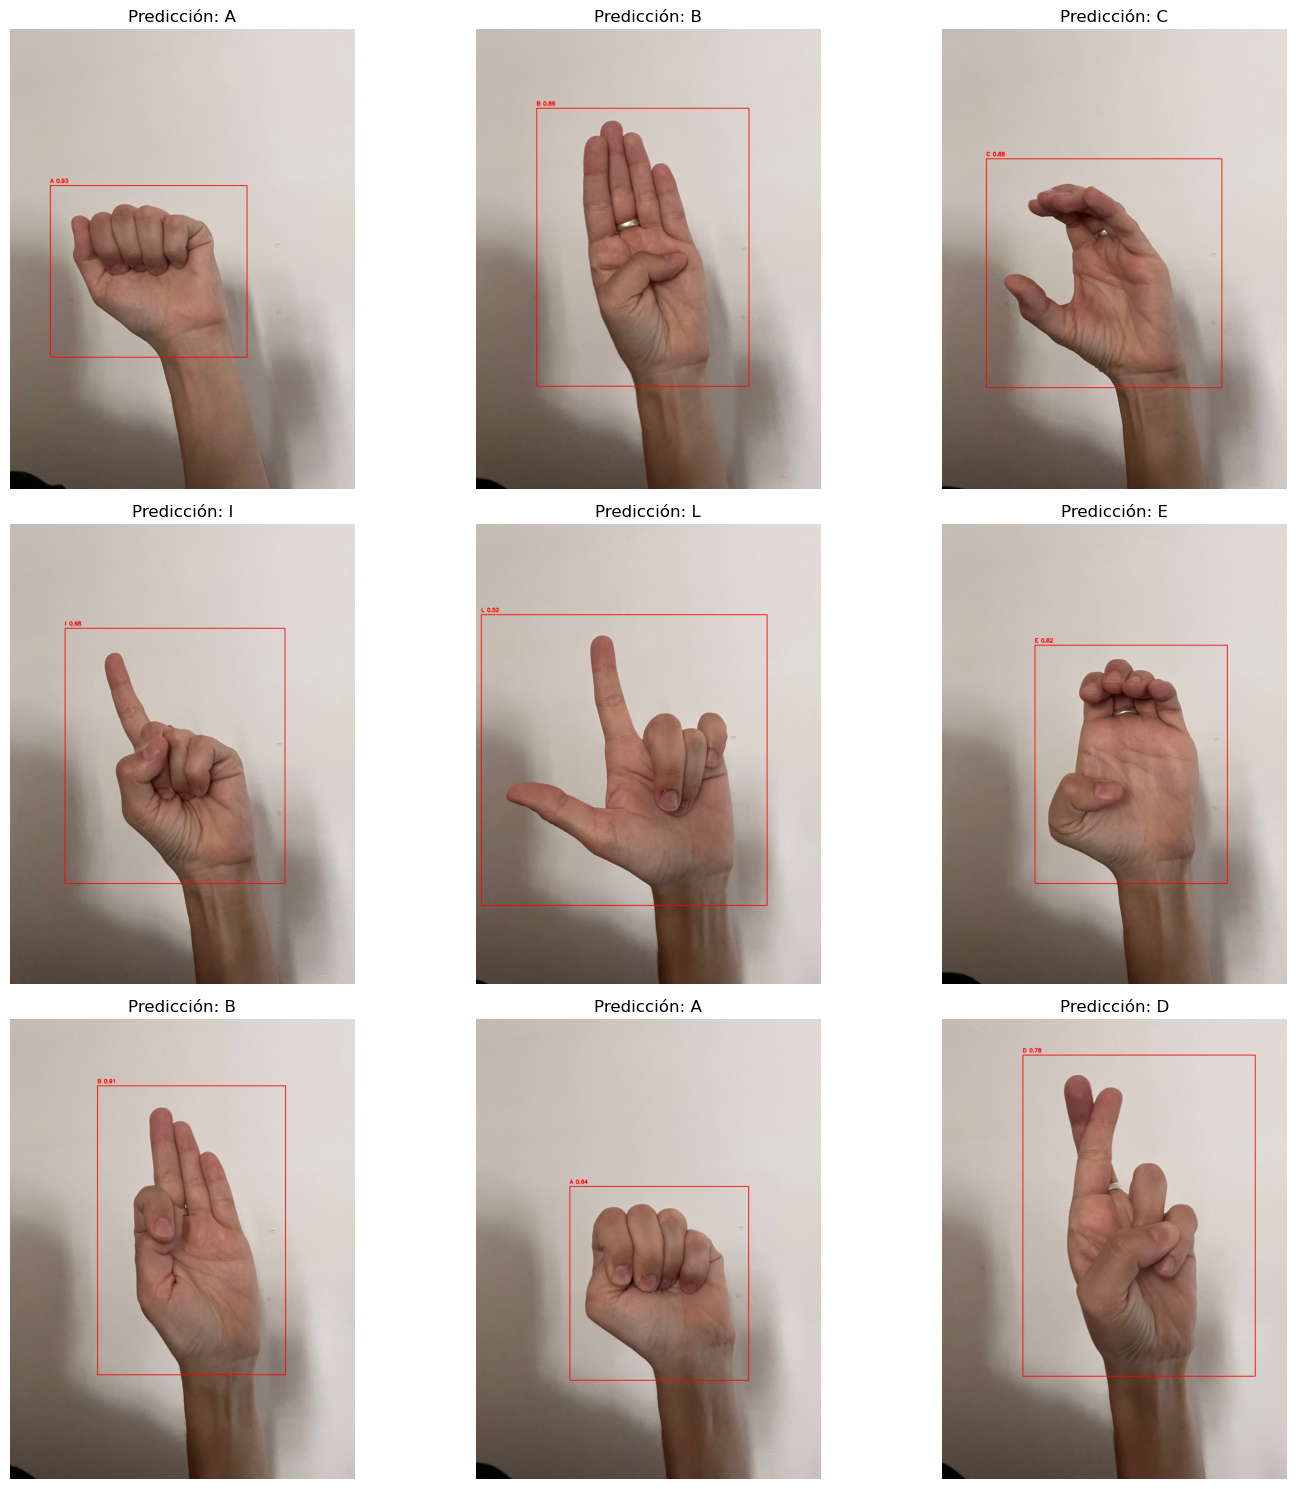

In [5]:
# Listar las imágenes en la carpeta
image_files = [f for f in os.listdir(test_images_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Configurar la visualización en grilla (3x3)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3 filas y 3 columnas

# Iterar a través de las primeras 9 imágenes
for i, img_file in enumerate(image_files[:9]):
    img_path = os.path.join(test_images_dir, img_file)
    
    # Leer la imagen
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB para mostrar en matplotlib
    
    # Realizar la predicción con el modelo
    results = model(img)
    
    # Obtener las cajas delimitadoras y las clases
    boxes = results[0].boxes
    scores = boxes.conf  # Confianza de la predicción
    
    # Dibujar las cajas delimitadoras
    for j in range(len(scores)):
        if scores[j] > 0.5:  # Solo dibujar cajas con una probabilidad superior a 50%
            x1, y1, x2, y2 = boxes.xyxy[j].cpu().numpy()
            class_id = int(boxes.cls[j].cpu().numpy())
            class_name = results[0].names[class_id]
            confidence = scores[j].cpu().numpy()

            # Dibujar la caja
            cv2.rectangle(img_rgb, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)  # Rojo

            # Escribir el nombre de la clase y la confianza sobre la caja
            label = f'{class_name} {confidence:.2f}'
            cv2.putText(img_rgb, label, (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
    
    # Mostrar la imagen con la caja delimitadora en la grilla
    ax = axes[i // 3, i % 3]  # Ubicar la imagen en la grilla
    ax.imshow(img_rgb)
    ax.axis('off')  # No mostrar los ejes
    ax.set_title(f"Predicción: {class_name}")

# Ajustar la visualización para que no se superpongan
plt.tight_layout()
plt.show()


Vemos que hay algunas predicciones que no son correctas. 
* La F (fila 3 columna 1) la predice como B, si observamos ambas letras tiene cierto parecido.
* La M (fila 3 columna 2) la predice como A, si observamos ambas letras también son similares en este caso. 
* La R (fila 3 columna 3) la predice como D, tienen cierto parecido, pero menos que los anteriores casos ya que en este caso hay dos dedos levantados y la D tiene solo uno.

Veremos, luego de ver como funciona en video, si mejoramos el modelo.

## Pruebas con video

### Prueba 1

In [ ]:
# Definir el umbral de probabilidad mínima para aceptar una predicción
threshold = 0.5

: 

In [ ]:
# Inicializar la cámara
cap = cv2.VideoCapture(0)  # 0 es el índice para la cámara predeterminada

while True:
    # Capturar una imagen desde la cámara
    ret, frame = cap.read()
    
    if not ret:
        print("No se pudo acceder a la cámara.")
        break
    
    # Realizar la predicción con el modelo YOLO
    results = model(frame)  # Predicción en la imagen capturada
    boxes = results[0].boxes
    scores = boxes.conf  # Confianza de la predicción
    
    # Si la probabilidad es mayor que el umbral, mostramos la letra predicha
    if len(scores) > 0 and max(scores) > threshold:
        max_score_idx = np.argmax(scores)
        class_id = int(boxes.cls[max_score_idx].cpu().numpy())
        class_name = results[0].names[class_id]
        confidence = scores[max_score_idx].cpu().numpy()

        # Mostrar la letra reconocida y la confianza
        cv2.putText(frame, f"{class_name} ({confidence:.2f})", 
                    (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    else:
        # Si la probabilidad es baja, mostrar un mensaje de error
        cv2.putText(frame, "No es posible reconocer la letra", 
                    (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    
    # Mostrar la imagen en una ventana
    cv2.imshow('Predicción en tiempo real', frame)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la cámara y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()


0: 480x640 (no detections), 286.3ms
Speed: 0.0ms preprocess, 286.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 185.1ms
Speed: 5.0ms preprocess, 185.1ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 O, 156.0ms
Speed: 0.0ms preprocess, 156.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 O, 138.7ms
Speed: 0.0ms preprocess, 138.7ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 167.3ms
Speed: 0.0ms preprocess, 167.3ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 X, 172.6ms
Speed: 1.6ms preprocess, 172.6ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 131.2ms
Speed: 0.0ms preprocess, 131.2ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 (no detections), 134.9ms
Speed: 0.0ms preprocess, 134.9ms inference, 0.0ms post

### Prueba 2

Es posible que el problema se deba a que la cámara está detectando el rostro en lugar de la mano, lo que hace que el modelo no pueda identificar la seña correctamente. Una forma de mejorar esto es enfocarse en detectar la mano en lugar de la cara y hacer un zoom en esa área para facilitar la predicción.

Solución:
* Detectar la mano: Si tu modelo YOLO fue entrenado para reconocer gestos de la mano, puedes hacer que el modelo busque específicamente esas regiones de la imagen. Si tu modelo no está entrenado para reconocer la mano, una opción es usar un detector de manos (por ejemplo, el modelo MediaPipe de Google, que es bastante eficiente para detectar manos).

* Recortar y hacer zoom en la región de la mano: Una vez que hayas detectado la mano, puedes recortar esa parte de la imagen para hacer un "zoom" en la región donde se encuentra la mano, lo que mejorará la precisión de la predicción.

In [ ]:
# Definir el umbral de probabilidad mínima para aceptar una predicción
threshold = 0.2

In [ ]:
# Inicializar MediaPipe Hands para detectar la mano
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_draw = mp.solutions.drawing_utils

# Inicializar la cámara
cap = cv2.VideoCapture(0)  # 0 es el índice para la cámara predeterminada

while True:
    ret, frame = cap.read()
    if not ret:
        print("No se pudo acceder a la cámara.")
        break

    # Convertir la imagen a RGB para MediaPipe
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Detectar manos en la imagen
    results = hands.process(frame_rgb)
    
    if results.multi_hand_landmarks:
        for landmarks in results.multi_hand_landmarks:
            # Dibujar las conexiones de la mano (opcional, para ver la detección)
            mp_draw.draw_landmarks(frame, landmarks, mp_hands.HAND_CONNECTIONS)
        
            # Obtener la región de la mano (bounding box)
            x_min = int(min([lm.x for lm in landmarks.landmark]) * frame.shape[1])
            y_min = int(min([lm.y for lm in landmarks.landmark]) * frame.shape[0])
            x_max = int(max([lm.x for lm in landmarks.landmark]) * frame.shape[1])
            y_max = int(max([lm.y for lm in landmarks.landmark]) * frame.shape[0])
            
            # Hacer un "zoom" en la región de la mano
            hand_region = frame[y_min:y_max, x_min:x_max]

            # Mostrar la región de la mano (el zoom)
            cv2.imshow("Región de la mano (Zoom)", hand_region)

            # Asegurarse de que las coordenadas sean válidas
            if x_min < 0: x_min = 0
            if y_min < 0: y_min = 0
            if x_max > frame.shape[1]: x_max = frame.shape[1]
            if y_max > frame.shape[0]: y_max = frame.shape[0]

            # Verificar que las dimensiones de la caja sean positivas
            if x_max > x_min and y_max > y_min:
                hand_region = frame[y_min:y_max, x_min:x_max]
            else:
                hand_region = frame  # Si la caja es incorrecta, procesamos toda la imagen

            # Realizar la predicción con YOLO sobre la región de la mano
            results = model(hand_region)

            # Obtener las cajas delimitadoras y las clases
            boxes = results[0].boxes
            scores = boxes.conf  # Confianza de la predicción

            # Dibujar las cajas delimitadoras en la región de la mano
            for j in range(len(scores)):
                if scores[j] > threshold:  # Solo mostrar si la confianza es alta
                    x1, y1, x2, y2 = boxes.xyxy[j].cpu().numpy()
                    class_id = int(boxes.cls[j].cpu().numpy())
                    class_name = results[0].names[class_id]
                    confidence = scores[j].cpu().numpy()

                    # Dibujar la caja en la imagen original (coordenadas relativas)
                    cv2.rectangle(frame, (x_min + int(x1), y_min + int(y1)),
                                  (x_min + int(x2), y_min + int(y2)), (255, 0, 0), 2)

                    # Escribir el nombre de la clase y la confianza
                    label = f'{class_name} {confidence:.2f}'
                    cv2.putText(frame, label, (x_min + int(x1), y_min + int(y1 - 10)),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    else:
        # Si no se detecta ninguna mano, mostrar el mensaje
        cv2.putText(frame, "No se detecto la mano", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Mostrar la imagen con la predicción
    cv2.imshow('Predicción en tiempo real', frame)

    # Salir del bucle si se presiona la tecla 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar la cámara y cerrar las ventanas
cap.release()
cv2.destroyAllWindows()



0: 640x480 (no detections), 128.3ms
Speed: 1.2ms preprocess, 128.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)

0: 640x544 (no detections), 182.7ms
Speed: 1.2ms preprocess, 182.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)

0: 640x512 (no detections), 130.0ms
Speed: 0.0ms preprocess, 130.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 (no detections), 135.0ms
Speed: 0.0ms preprocess, 135.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 (no detections), 136.0ms
Speed: 2.4ms preprocess, 136.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 512)

0: 640x544 (no detections), 192.1ms
Speed: 0.0ms preprocess, 192.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 134.4ms
Speed: 3.2ms preprocess, 134.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 145.0ms
Speed: 3.0ms prepr